In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
# check the dimensions
data = pd.read_csv("advertising.csv", index_col=0)
data.shape

(200, 4)

D:\install\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Newspaper'}, xlabel='newspaper', ylabel='sales'>

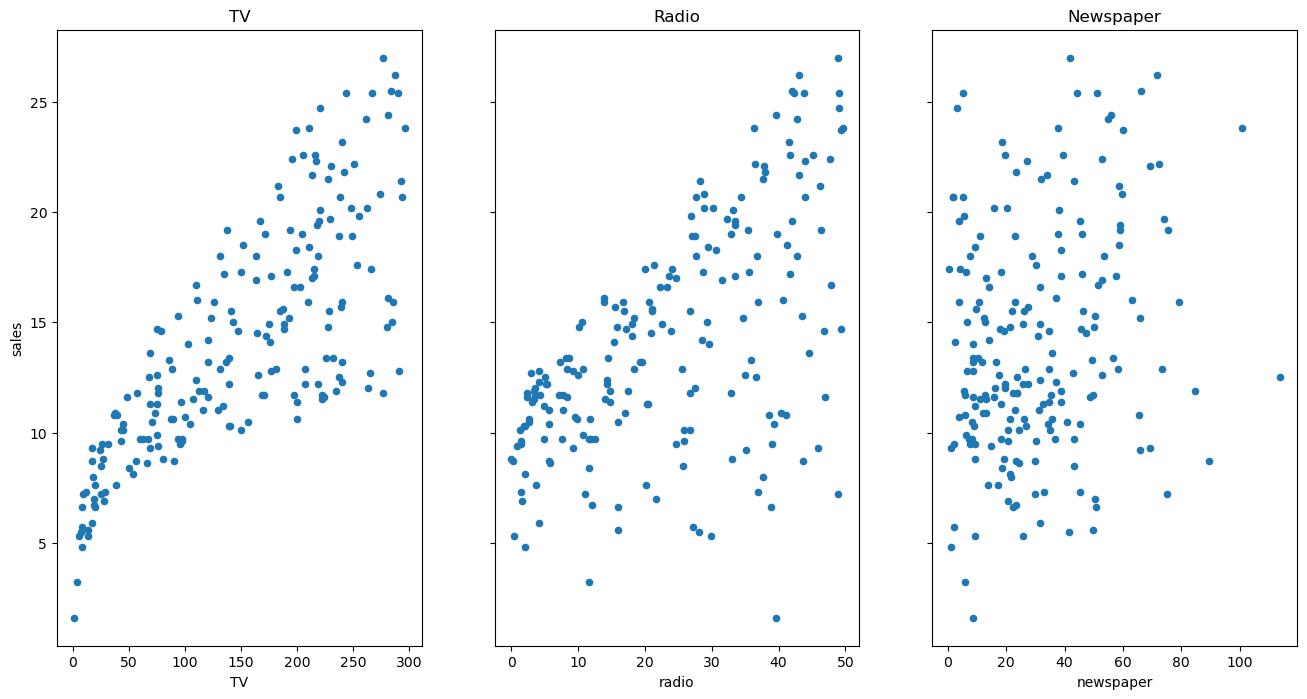

In [3]:
# visualize data on each features against outcome value
fig, axis = plt.subplots(1, 3, sharey=True)
data.plot(kind="scatter", x="TV", y="sales", ax=axis[0], title="TV")
data.plot(kind="scatter", x="radio", y="sales", ax=axis[1], title="Radio")
data.plot(kind="scatter", x="newspaper", y="sales", ax=axis[2], title="Newspaper", figsize=(16,8))

In [4]:
# evaluate one of the column to see the relationship - TV column is used
feature_cols = ["TV"]
x = data[feature_cols]
y = data.sales

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x ,y)
print("Intercept %s" % lm.intercept_)
print("Coefficient %s" % lm.coef_)
print("Value of y(sales) when x = 50 ", ((lm.coef_ * 50) + lm.intercept_)) #9.40942557

# use lm model and predict, this will output the same value 
x_new = pd.DataFrame({"TV":[50]})
x_new.head()
lm.predict(x_new) #9.40942557

Intercept 7.032593549127694
Coefficient [0.04753664]
Value of y(sales) when x = 50  [9.40942557]


array([9.40942557])

[ 7.0658692  21.12245377]


D:\install\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


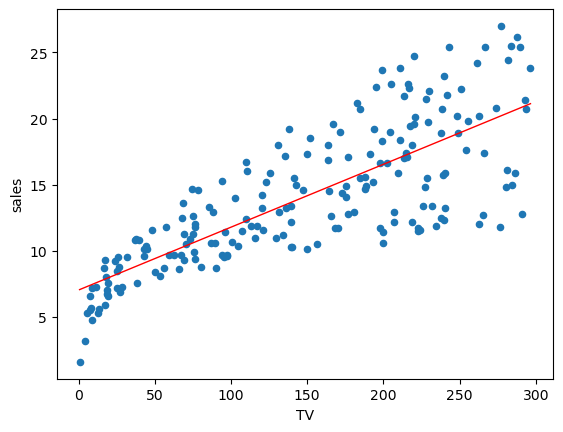

In [5]:
# visually check whether TV has a relationship with sales, for that predict y value for min, max of x and draw a line 
x_new = pd.DataFrame({"TV":[data.TV.min(), data.TV.max()]})
y_new = lm.predict(x_new)
print(y_new)
data.plot(kind="scatter", x="TV", y="sales")
plt.plot(x_new, y_new, c="red", linewidth=1)

In [6]:
# confidence interval and pvalue, R^2
import statsmodels.formula.api as smf
lm = smf.ols(formula="sales ~ TV", data=data).fit()
print("Confidence interval\n---------------------")
print(lm.conf_int())

print("\np-value\n----------------------")
print(lm.pvalues)
print("R-squared - %s" % lm.rsquared)

Confidence interval
---------------------
                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

p-value
----------------------
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64
R-squared - 0.611875050850071


In [7]:
# multi-linear regression model evaluation
feature_cols = ["TV", "radio", "newspaper"]
x = data[feature_cols]
y = data.sales

from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(x_train, y_train)
print("Intercept %s" % lm.intercept_)
print("Coefficient %s" % lm.coef_)

# print sqrt mean error
pred = lm.predict(x_test)
print("Sqrt mean error - %s" % sqrt(mean_squared_error(y_test, pred)))

Intercept 2.979067338122631
Coefficient [0.04472952 0.18919505 0.00276111]
Sqrt mean error - 1.7815996615334495


In [8]:
# selection of features -> tv, radio, newspaper. newspaper looks irrelavant due to hign pValue
lm = smf.ols(formula="sales ~ TV + radio + newspaper", data=data).fit()
print(lm.conf_int())
lm.summary()

                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
radio      0.171547  0.205513
newspaper -0.012616  0.010541


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        14:22:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# selection of features -> tv, radio. this fits best
lm = smf.ols(formula="sales ~ TV + radio", data=data).fit()
print(lm.conf_int())
lm.summary()

                  0         1
Intercept  2.340343  3.501857
TV         0.043013  0.048497
radio      0.172139  0.203850


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           4.83e-98
Time:                        14:22:43   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""